## 2) Use decision trees to prepare a model on fraud data 
treating those who have taxable_income <= 30000 as "Risky" and others are "Good"


## ANSWER:

In [1]:
#Import necessary libraray
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
#Reading the Fraud Check Data
fraud = pd.read_csv("fraud.csv")

In [3]:
#Let's find top five rows
fraud.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [4]:
#Let's find the columns names
fraud.columns

Index(['Undergrad', 'Marital.Status', 'Taxable.Income', 'City.Population',
       'Work.Experience', 'Urban'],
      dtype='object')

In [5]:
#Let's find the number of null values in each columns
fraud.isnull().sum()

Undergrad          0
Marital.Status     0
Taxable.Income     0
City.Population    0
Work.Experience    0
Urban              0
dtype: int64

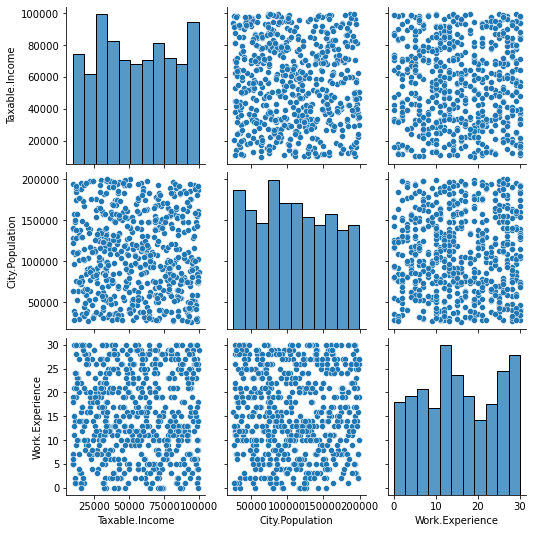

In [6]:
#Let's plot the graph
sns.pairplot(fraud)

In [7]:
#Let's apply given condition
fraud["TaxInc"] = pd.cut(fraud["Taxable.Income"], bins = [10002,30000,99620], labels = ["Risky", "Good"])

In [8]:
#Let's Drop 
fraudCheck = fraud.drop(columns=["Taxable.Income"])

In [9]:
fCheck = pd.get_dummies(fraudCheck.drop(columns = ["TaxInc"]))

In [10]:
fCheck

,City.Population,Work.Experience,Undergrad_NO,Undergrad_YES,Marital.Status_Divorced,Marital.Status_Married,Marital.Status_Single,Urban_NO,Urban_YES
0,50047,10,1,0,0,0,1,0,1
1,134075,18,0,1,1,0,0,0,1
2,160205,30,1,0,0,1,0,0,1
3,193264,15,0,1,0,0,1,0,1
4,27533,28,1,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...
595,39492,7,0,1,1,0,0,0,1
596,55369,2,0,1,1,0,0,0,1
597,154058,0,1,0,1,0,0,0,1
598,180083,17,0,1,0,1,0,1,0


In [11]:
fraud_final = pd.concat([fCheck, fraudCheck["TaxInc"]], axis = 1)

In [12]:
fraud_final

,City.Population,Work.Experience,Undergrad_NO,Undergrad_YES,Marital.Status_Divorced,Marital.Status_Married,Marital.Status_Single,Urban_NO,Urban_YES,TaxInc
0,50047,10,1,0,0,0,1,0,1,Good
1,134075,18,0,1,1,0,0,0,1,Good
2,160205,30,1,0,0,1,0,0,1,Good
3,193264,15,0,1,0,0,1,0,1,Good
4,27533,28,1,0,0,1,0,1,0,Good
...,...,...,...,...,...,...,...,...,...,...
595,39492,7,0,1,1,0,0,0,1,Good
596,55369,2,0,1,1,0,0,0,1,Good
597,154058,0,1,0,1,0,0,0,1,Good
598,180083,17,0,1,0,1,0,1,0,Good


In [13]:
colnames = list(fraud_final.columns)
colnames

['City.Population',
 'Work.Experience',
 'Undergrad_NO',
 'Undergrad_YES',
 'Marital.Status_Divorced',
 'Marital.Status_Married',
 'Marital.Status_Single',
 'Urban_NO',
 'Urban_YES',
 'TaxInc']

In [14]:
predictors = colnames[:9]
predictors

['City.Population',
 'Work.Experience',
 'Undergrad_NO',
 'Undergrad_YES',
 'Marital.Status_Divorced',
 'Marital.Status_Married',
 'Marital.Status_Single',
 'Urban_NO',
 'Urban_YES']

In [15]:
target = colnames[9]
target

'TaxInc'

In [16]:
#Let's define x
X = fraud_final[predictors]

In [17]:
#Let's find shape
X.shape

(600, 9)

In [18]:
#Let's assign Y
Y = fraud_final[target]

In [19]:
Y

0      Good
1      Good
2      Good
3      Good
4      Good
       ... 
595    Good
596    Good
597    Good
598    Good
599    Good
Name: TaxInc, Length: 600, dtype: category
Categories (2, object): ['Risky' < 'Good']

 # Decision Tree Model

In [20]:
# Splitting data into training and testing data set
from sklearn.model_selection import train_test_split
train, test = train_test_split(fraud_final, test_size = 0.3)

In [21]:
fraud_final["TaxInc"].unique()

['Good', 'Risky']
Categories (2, object): ['Risky' < 'Good']

### Building Decision Tree Classifier using Entropy Criteria

In [22]:
from sklearn.tree import DecisionTreeClassifier
help(DecisionTreeClassifier)

Help on class DecisionTreeClassifier in module sklearn.tree._classes:

class DecisionTreeClassifier(sklearn.base.ClassifierMixin, BaseDecisionTree)
 |  DecisionTreeClassifier(*, criterion='gini', splitter='best', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None, class_weight=None, presort='deprecated', ccp_alpha=0.0)
 |  
 |  A decision tree classifier.
 |  
 |  Read more in the :ref:`User Guide <tree>`.
 |  
 |  Parameters
 |  ----------
 |  criterion : {"gini", "entropy"}, default="gini"
 |      The function to measure the quality of a split. Supported criteria are
 |      "gini" for the Gini impurity and "entropy" for the information gain.
 |  
 |  splitter : {"best", "random"}, default="best"
 |      The strategy used to choose the split at each node. Supported
 |      strategies are "best" to choose the best split and "random" to choos

In [23]:
#Build a model
model = DecisionTreeClassifier(criterion = "entropy",max_depth=5)
model.fit(train[predictors], train[[target]])

DecisionTreeClassifier(criterion='entropy', max_depth=5)

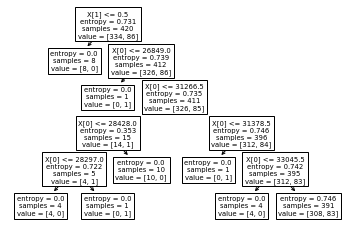

In [24]:
#Let's Draw Tree
from sklearn import tree #To draw tree
tree.plot_tree(model);

In [25]:
# predicting on test data set
preds = model.predict(test[predictors])
preds

array(['Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
      

In [26]:
# getting the count of each category 
pd.Series(preds).value_counts()

Good     179
Risky      1
dtype: int64

In [27]:
177/(177+3)

0.9833333333333333

In [28]:
# getting the 2 way table to understand the correct and wrong predictions
pd.crosstab(test[target],preds)

col_0,Good,Risky
TaxInc,,
Risky,38,0
Good,141,1


In [29]:
temp = pd.Series(model.predict(train[predictors])).reset_index(drop=True)
np.mean(pd.Series(train.TaxInc).reset_index(drop=True)==pd.Series(model.predict(train[predictors])))
np.mean(preds==test.TaxInc)

0.7833333333333333